# Overfitting

### Introduction

At this point, we have seen our three sources of error in a machine learning model: irreducible error, variance and bias.  We've seen that bias can be caused by underfitting our model.  Here, let's see how overfitting contributes to variance in our model.

### Setting up our data

We have stored our feature data in the `data.py` file.  Our data adheres to the following model:

$$customer\_amount = 3*temp + 40*is\_weekend + 10 + \epsilon_i$$

This is the error related to our model, when we properly fit a model with temperatures and weekends against our data.

In [1]:
from data import temps_and_is_weekends, customers_with_errors

In [15]:
customers = pd.Series(customers_with_errors)

In [21]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.stack(temps_and_is_weekends, axis = 0), columns = ['temperature', 'is_weekend'])
df_customer = df.assign(customers = customers)

In [22]:
df_customer[:3]

temperature  is_weekend  customers
0           30           0        125
1           31           0        133
2           32           1        170

In [24]:
X = df_customer[['temperature', 'is_weekend']]
y = df_customer['customers']

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
model = LinearRegression()
model.fit(X, y)

sqrt(mean_squared_error(customers_with_errors, model.predict(temps_and_is_weekends)))

21.565735597602885

In [28]:
model.score(X, y)

0.9059072683379463

That error is caused by randomness in our training data.  Here is our related plot.

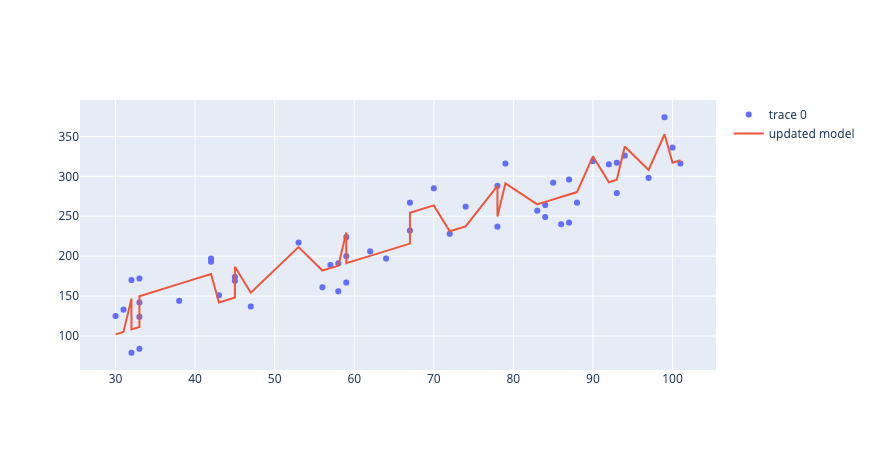

In [27]:
import plotly.graph_objects as go
import numpy as np
predictions = model.predict(X)

temp = df_customer['temperature']
trace_1 = go.Scatter(x = temp, y =  y, mode = 'markers') 
model_trace = go.Scatter(x = temp, y = predictions, mode = 'lines', name = 'updated model')
go.Figure([trace_1, model_trace])

### We want more

Now our model is pretty good, and has an rmse of  21.5.  Let's try to do better.  One way that we try to improve our model is by adding another another feature.  But it's difficult to know beforehand if a feature is can be used to explain our outcome.  So we may be adding something to our model that is completely irrelevant.  Let's see what happens when we add an irrelevant feature into our model.

Our irrelevant feature is called `random_ages`, and it represents the average age of the cashiers who were working that day.  But really it's just a list of random data.  Because it's random data, it won't have any relevance to our customer amounts list.  Still, let's throw it into our model and see what happens.

In [29]:
from numpy.random import randint, seed
seed(2)
random_ages = randint(25, 65, 50)
random_ages[0:3]

array([40, 33, 47])

Ok, let's add it to our list of independent variables and throw it into our model.

In [63]:
X_with_ages = np.column_stack((X,random_ages))

In [64]:
from sklearn.linear_model import LinearRegression
updated_model = LinearRegression()
updated_model.fit(X_with_ages, customers_with_errors)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(customers_with_errors, updated_model.predict(X_with_ages)))

20.981542668372782

In [69]:
updated_model.coef_

array([ 3.05231752, 39.15999752, -0.43176901])

In [77]:
df_random_ages = pd.DataFrame(np.column_stack((X_with_ages, y)), columns = ['temp', 'is_weekend', 'random_ages', 'customers'])

In [78]:
df_random_ages[:3]

temp  is_weekend  random_ages  customers
0    30           0           40        125
1    31           0           33        133
2    32           1           47        170

In [ ]:
from sklearn.linear_model import LinearRegression
updated_model = LinearRegression()
updated_model.fit(X_with_ages, customers_with_errors)

Now as you can see, by introducing the `random_ages`, our rmse did decrease - even if just a little bit.  It went from 21.56 to 20.98.

### Why did this work?

So now we have two different models, and the one that includes our random list of average ages has the higher score.  But it seems like it can't be right.  Remember, we just randomly generated our list of ages.  They obviously did not cause an impact on our customer amounts.  So how do we account for the decrease in our error.

The reason why training with our list of random numbers improved the model is because of overfitting.  We are essentially including a noisy, irrelevant parameter in our model.  With this, our linear regression algorithm takes the numbers in this parameter and tries to find an association to the number of customers.  But this association, isn't really there.  It's just picking up on a coincidental association between the random numbers and the average customers.  

We named this error as variance.  As we see, introducing *more* parameters makes our model more flexible and thus introduces more variance.  

This struggle to balance adding too many parameters and introducing error due to variance, or not including enough parameters and introducing error due to bias is called the bias variance tradeoff.  We'll continue to explore this, as well as a technique to help us strike the right balance - by again using a holdout set.

### Summary 

In this lesson, we saw another source of error called variance.  Error due to variance occurs when our model is too flexible, and we include parameters that do not have predictive value.  Error due to variance can be deceptive because when we introduce variance the score on our training data improves.  However, this is due to our model fitting to randomness in the training data and not detecting an underlying association between our new independent variable and our dependent variable.

We have now seen that error can occur from including too few parameters, which introduces bias, and from too many parameters, which introduces variance.